# Week 3: Numerical Integration Methods

Name: Manav Bilakhia

Date: 20th September 2022

## Library Imports Go Here

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy

## The Basic Integration Functions

### Box Integration

<font color = blue>
Write a function that implements the box approximation method.  Your function should take, as input, a function F, the lower and upper integration limits $x_0$ and $x_f$. and the number of rectangles to be used in the approximation $N$.  It should return the result of the approximation.

In [2]:
def box_approx(F, x0, xf, N): 
    j = 0
    sumation = 0
    delf = ((xf - x0)/N) #calculating delta_x 
    while (j < N):
        sumation = sumation + (F(x0+(j*delf))*delf) #sumation of area of each division
        j+=1
    return sumation

def a (x): # math function for x^2
    return x**2
box_approx(a, 0, 10, 1000) #test expected outcome 333.33333


332.8334999999999

A function that approximates the area under the curve for a given function using box approximation

### Trapezoid Integration

<font color = blue>
Write a second function that does the same thing, but uses the trapezoidal method.

In [3]:
def trap_approx(F, x0, xf, N):
    smation = 0
    delf = ((xf - x0)/N) #calculating delta_x 
    sumation =  box_approx(F, x0, xf, N) + (F(xf)-F(x0))*0.5*delf  #sumation of area of each division
    return sumation
def a (x): # math function for x^2
    return x**2
trap_approx(a, 0, 10, 1000)  #test expected outcome 333.33333    

333.3334999999999

A function that approximates the area under the curve for a given function using trapezoid approximation

### Testing, testing

<font color = blue>
Test both of your pieces of code on the function

$$
f(x) = \frac{x^2}{2}
$$

with the limits of integration $[-1, 3]$ and $N = 100$.  Also work out the integral analytically (show your work below), and compare the results.

In [4]:
def b(x): #math funtion for testing
    return (x**2)*0.5
print(trap_approx(b, -1, 3, 100))  # actual answer 4.66666666667
print(box_approx(b, -1, 3, 100)) # actual answer 4.66666666667 

4.667200000000002
4.587200000000002


$\int_{-1}^{3} \frac{x^2}{2}dx$

$=\left[\frac{x^3}{6}\right]_{-1}^{3}$

$=\frac{14}{3}$

$=4.66666666667$

This validates that trapezoid approximation is more accurate than box approximation but both of them never realy reach the actual value. 

## Gaussian Integration

<font color = blue>
We now want to use out numerical integration method to approximate the Gaussian integral

$$
\int_{-\infty}^{\infty} e^{-x^2} \, dx
$$

which has the known analytic value $\sqrt{\pi}$.  Here there is an additional challenge, becuase we can't expect to use $\pm\infty$ as inputs for our numerical work.

### Plotting the Function

<font color = blue>
Begin by plotting the function $e^{-x^2}$.  This becomes approximately zero, far enough from $x = 0$.  Use the plot to appropriately choose limits of integration to use in the numerical work.

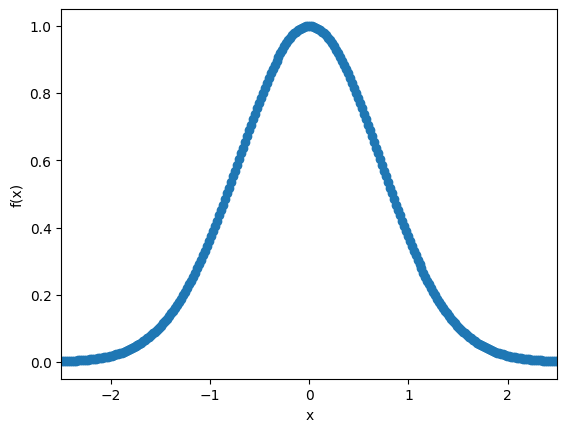

In [5]:
def gaussian_integrand(x): # defines the mathematical gaussian integral
    return (math.e**(-x**2))
xvalues = np.linspace(-10,10,1000) 
yvalues = np.array([gaussian_integrand(x) for x in xvalues])
plt.scatter(xvalues, yvalues)
plt.xlim(-2.5, 2.5)
plt.plot()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

This is the Gaussian function which is known to peak at x = 0. By trial and error, we found it to converge to 0 at $x = \pm 2.5$. Therefore we could choose the limits of integration to be [-2.5, 2.5]

### Evaluating the Integral

<font color = blue>
Using these limits, evaluate the Gaussian integral with your trapezoidal approximation function, and compare the result with the analytic value

In [6]:
print("Using trapezoidal approximation",trap_approx(gaussian_integrand, -2.5, 2.5, 100)) #test
print("Using box approximation",box_approx(gaussian_integrand, -2.5, 2.5, 100)) #test

Using trapezoidal approximation 1.7717285286376756
Using box approximation 1.7717285286376756


We know so far that a trapezoid approximation for an integral is supposed to be more accurate than the box approximation for a given value of N. In this case it is surprising to see that for the same N, we get the same approximation. This is because we evaluate this integral for the limits [-2.5,2.5] and not until the roots of this given integrand. Trapezoid approximation does a better job at approximating the area under the curve because of how accurate it is at the end points. Here the limits of integration are not at the endpoints of the curve but in the middle. We know that the analytical value for the Gaussian Integral is $\sqrt{\pi} = 1.77245.....$. We see that the trapezoid method also approaches the same value of $ 1.77245.....$

### Sources of Error

<font color = blue>
The evaluation you have done actually has two sources of error: the error associated with approximating an integral as a series of trapezoidal areas, and the error associated with cutting off the region of integration.  It's instructive to know how much each is contributing to the error, and which is most significant.  (This will, of course, depend on your choices of $N$ and the region of integration.)

Compute the approximation of the integral for some value of $N$, and then again for twice that value.  This decreasees the width of each trapezoid by $\frac{1}{2}$, and should make the approximation matter.  Calculate the difference between the two results.

Then compare the result you had for your first value of $N$ with a result where you double the total size of your region of integration.  You should also double your value of $N$, so that the width of each trapezoid is unchanged.  Calculate the difference between the original result and this result.

Finally, comment on which is your dominant source of error.

In [7]:
print(trap_approx(gaussian_integrand, -5, 5, 100))
print(trap_approx(gaussian_integrand, -5, 5, 200))
print(trap_approx(gaussian_integrand, -10, 10, 200))
print ("double N",trap_approx(gaussian_integrand, -5, 5, 200)-trap_approx(gaussian_integrand, -5, 5, 100))
print ("double N, double region",trap_approx(gaussian_integrand, -10, 10, 200)-trap_approx(gaussian_integrand, -5, 5, 100))

1.7724538509025631
1.772453850902735
1.7724538509055159
double N 1.7186252421197423e-13
double N, double region 2.9527491562930663e-12


When we double the value of N (from 100 to 200), the error is 1.7186252421197423e-13. Now we double the region and double of value on N and compare it with our original value, the difference is 2.9527491562930663e-12. The approximation is much accurate when we keep the size of the region the same and double the value of N. Which means the major source of error comes from increasing the region and not consequently increasing the size of N. 

## The Sinc Function

<font color = blue>
Now we want to work at approximating the integral

$$
\mathcal{I} = \int_{0}^{10} \frac{\sin x}{x} \, dx
$$

Although the integrand is actually finite for all values of $x$, a computer is going it have trouble evaluating it at $x = 0$.  Find a way to work around this difficulty that does not introduce additional sources of error into your code.  Evaluate the integral using $N = 100$.

In [8]:
def sinc(x):
    if x ==0:
        return 1 # small angle approximation
    else:
        return math.sin(x)/x
print("the function ",sinc(math.pi/2)) # testing the function
print("trapezoid approximation ",trap_approx(sinc, 0, 10, 100)) # trapezoid approx
print("box approximation ",box_approx(sinc, 0, 10, 100)) # box approximation

the function  0.6366197723675814
trapezoid approximation  1.6582821963661236
box approximation  1.7110023019205705


Here we use the small approximation ($\sin(x)=x$) to handle for small values of x. This makes the the numerator of our integrand $x$. Therefore the value of the function at lower  values of $x$ approximates to 1. We then use trapezoid and box approximation methods to calculate the integral. 

## The Period of the Pendulum

### Creating the Function

<font color = blue>
In class we showed that the (dimensionless) period of the pendulum as a function of initial angle $\theta_0$ would be

$$
\tau(\theta_0) = \frac{2}{\pi}\int_{0}^{\pi/2} \frac{1}{\sqrt{1 - \sin^2\frac{\theta_0}{2}\sin^2\phi}} \, d\phi
$$

Create a module that will find the (dimensionless) period of the pendulum.  Check its output by evaluating it at $\theta_0 = 0.1$.  Does the result make sense?  (Hint: what would the "small angle" approximation tell you?)

In [9]:
def period(theta0): # function that calculates the period 
    def func(phi):# mathematical function to be integrated
        return 1/(1-(((math.sin(theta0/2))**2)*((math.sin(phi))**2)))**(1/2)
    return (2/math.pi* trap_approx(func, 0, math.pi/2, 1000))
period(0.01) #test

1.0000062500358078

As we apply the small angle of approximation, we would get the value of $\tau = 1$ for $\theta_{0} = 0$. Hence it makes make sense for $\tau$ to be a value although greater than but very close to 1 for $\theta_{0} = 0.1$.
We enter the dimensionless zone by dividing $\frac{T}{T_{0}}$ i.e. the dimensionless period. When we use small angle approximation, what we are essentially doing is finding the value of $\frac{T_{0}}{T_{0}} = 1$

### * Plotting the Period

<font color = blue>
Make a plot of $\tau$ as a function of $\theta_0$ over the range $[0, \pi - .01]$.  Add to the plot a horizontal line at $\tau = 1$ and a vertical line at $\theta_0 = \pi$, to make the plot easier to read.  Discuss the result thoroughly!

[]

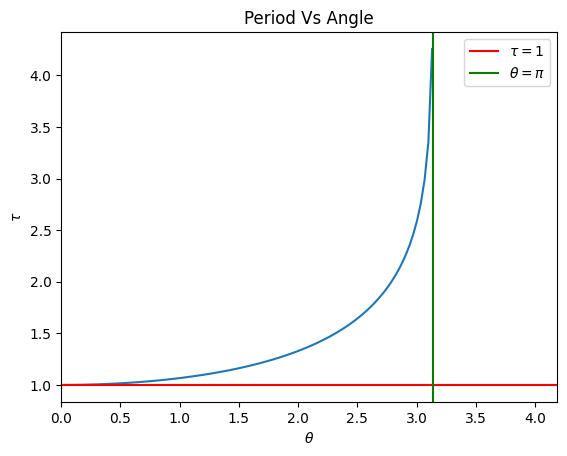

In [10]:
xvalues = np.linspace(0,math.pi -0.01,100) 
yvalues = np.array([period(x) for x in xvalues])
plt.plot(xvalues, yvalues)
plt.xlim(0, 4*math.pi/3)
plt.axhline(y = 1, color = 'r', linestyle = '-',label = "$\\tau = 1$")#plots the line of the fixed point
plt.axvline(x = math.pi, color = 'g', linestyle = '-',label = "$\\theta = \pi$")#plots the line of the fixed point
plt.xlabel("$\\theta$")
plt.ylabel("$\\tau$")
plt.title("Period Vs Angle")
plt.legend()
plt.plot()

The graph shows the relationship between angle and the time period for a pendulum. When the angle $\theta = \pi$, the pendulum does not oscillate and hence time period approaches infinity. Hence we only use values of $\theta$ over the range $[0,\pi−.01]$. We know that for smaller angles we can use the small angle approximation in which case the time period ends up being $T_{0}$ when we use the dimensionalized equation. We see that the graph approaches $\tau = 1$ were $\frac{T}{T_{0}}$for small angles as this is the non dimensionalized form which in the dimensionalized form is $T_{0}$. This graph also shows us that for small angles, the time period is also small. 

## Simpson's Method

### The Basic Function

<font color = blue>
Write a function that implements Simpson's method.  It should take as inputs the function F, limits of integration $x_0$ and $x_f$, and the number of regions $N$.  

Since in this case $N$ must be an even integer, in the event that the user imputs a value that is not an even integer have the function print a warning message, but then approximate $N$ as the nearest even integer to the one provided, and then proceed with the calculation.

In [11]:
def Simpson(F, x0,xf,N): 
    if (N % 2) != 0:
        print("value of N not evan. Making it even by adding 1") #making sure value of N is even
        N=N+1 
    if (N % 2) == 0: 
        looprange = int((N)/2) #dividing the value by 2
        del_x = (xf-x0)/N
        sumation = 0
        for m in range(looprange):
            sumation = sumation +  F(x0+((2*m)*del_x))+ 4*(F(x0+(((2*m)+1)*del_x)))+ F(x0+(((2*m)+2)*del_x))
    return (sumation *(del_x)/3)
    
def a (x): #test
    return x**3
Simpson(a, 0, 10, 10)

2500.0

THe function defines the Simpson's method to approximate the area of a mathematical function f, for the limit x0 and xf with N divisions. This method turns out to be more accurate than the trapezoid method. 

### Testing

<font color = blue>
Test your code on the same function

$$
f(x) = \frac{x^2}{2}
$$

that you previously used for the box and trapezoidal integrals.  Note that since this is quadratic, the Simpson method should give the exact correct answer.

In [12]:
def simpson_test(x): #test
    return ((x**2)/2)
Simpson(simpson_test, -1, 3, 2)

4.666666666666667

Its interesting to see that the Simpson's method will give you a good approximation for the area under the curve as this method uses a polynomial function of degree 2 to approximate to another function. Here our input itself is a quadratic. 

## Comparing Accuracy

<font color = blue>
You now have three separate pieces of code for implementing approximations to an integral, each with greater accuracy than the last.  This is a good opportunity to quantitatively compare the methods.  We will use the integral

$$
\int_{0}^{1} x^5 \, dx
$$

to examine the accuracy.  For each method, the number $N$ (the number of subdivisions we split the integration region into) controls how accurate the method is.  Specifically, we have the width of each region $\Delta x \propto \frac{1}{N}$, and we expect the amount of error to decrease, the smaller $\Delta x$ is.

In [13]:
def compare_m_func(x): # mathematical function for x^5
    return x**5

### Analytic Calculation

<font color = blue>
Begin by working out the integral analytically, showing your work.

$\int_{0}^{1} x^5 dx$

$=\left[\frac{x^6}{6}\right]_{0}^{1}$

$=\frac{1}{6}$



### Box Integration Accuracy

<font color = blue>
For the box integration method, we expect the amount of error to be proportional to $\Delta x$, and thus to $\frac{1}{N}$.

Compute a table of the results of the box integral for values of $N$ between 100 and 1000 in steps of 10.  

Plot these results and confirm the essential behavior is correct.

Then, use the command curve_fit from the library "scipi.optimize" to fit this data to a function of the form
$$
C + \frac{A}{N}
$$
where $C$ is the analytic result of the integral.  Display this fitted curve together with the data on a single plot.

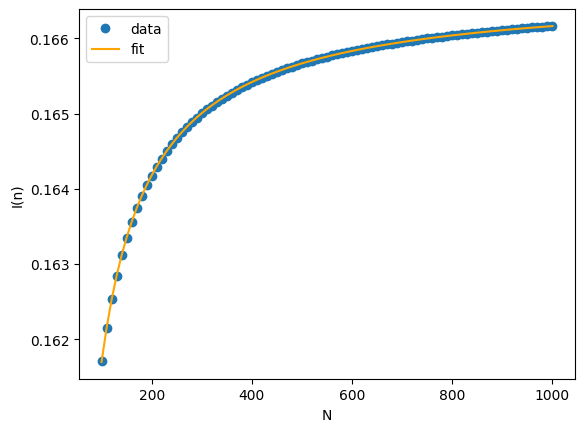

In [14]:
def fit1(N, A, C): # Curve that we would try to fit the box integration accuracy vs N with
    return C+(A/N)

xvalues = np.linspace(100, 1000, 91)
yvalues = np.array([box_approx(compare_m_func, 0, 1, x) for x in xvalues])
plt.plot(xvalues, yvalues, "o", label = "data")
parameters, covariance = scipy.optimize.curve_fit(fit1, xvalues, yvalues)
fit_A = parameters[0]
fit_B = parameters[1]
fit_y = fit1(xvalues, fit_A, fit_B)
plt.plot(xvalues, fit_y, '-', label='fit',color = "orange")
plt.xlabel("N")
plt.ylabel("I(n)")
plt.legend()
plt.show()

We see that the graph approaches the value of $\frac{1}{6}$ but never gets to the value. The fit clearly shows that the error is directly proportional to $\Delta x$ and thereby to $\frac{1}{N}$

### Trapezoid Integration Accuracy

<font color = blue>
Repeat the above procedure, but this time using the Trapezoid integration method, where the error should decrease as $\frac{1}{N^2}$.

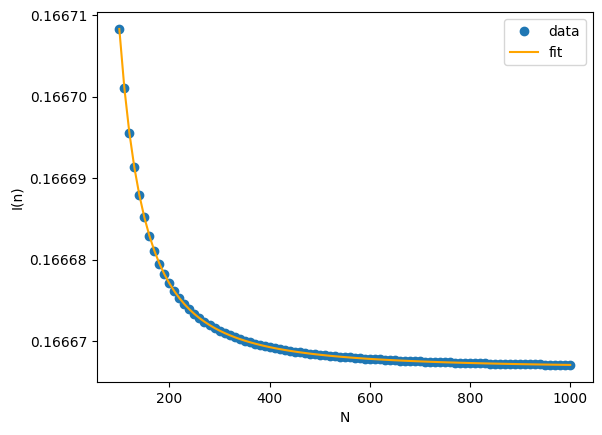

In [15]:
def fit2(N, A, C): # Curve that we would try to fit the trapezoid integration accuracy vs N with
    return C+(A/(N**2))

xvalues = np.linspace(100, 1000, 91)
yvalues = np.array([trap_approx(compare_m_func, 0, 1, x) for x in xvalues])
plt.plot(xvalues, yvalues, "o", label = "data")
parameters, covariance = scipy.optimize.curve_fit(fit2, xvalues, yvalues)
fit_A = parameters[0]
fit_B = parameters[1]
fit_y = fit2(xvalues, fit_A, fit_B)
plt.plot(xvalues, fit_y, '-', label='fit',color = "orange")
plt.xlabel("N")
plt.ylabel("I(n)")
plt.legend()
plt.show()

We see that the graph approaches the value of $\frac{1}{6}$ but never gets to the value. It is comparatively does get closer than the value returned by box approximation. The fit clearly shows that the error is directly proportional to $\Delta x$ and thereby to $\frac{1}{N^2}$.

### Simpson's Rule Accuracy

<font color = blue>
Finally, repeat the exercise one more time, with Simpson's rule, which we expect to have errors that scale as $\frac{1}{N^4}$.

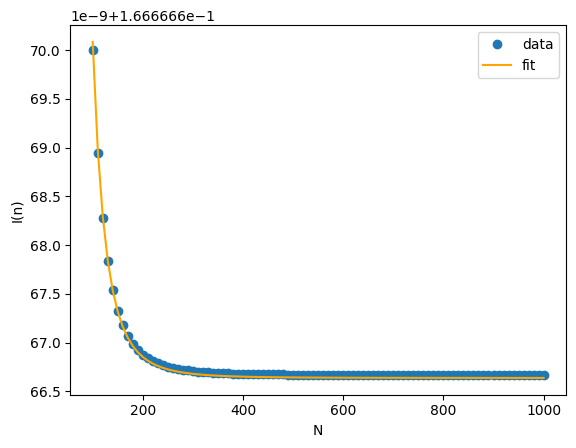

In [16]:
def fit3(N, A, C): # Curve that we would try to fit the Simpson integration accuracy vs N with
    return C+(A/(N**4))

xvalues = np.linspace(100, 1000, 91)
yvalues = np.array([Simpson(compare_m_func, 0, 1, x) for x in xvalues])
plt.plot(xvalues, yvalues, "o", label = "data")
parameters, covariance = scipy.optimize.curve_fit(fit3, xvalues, yvalues)
fit_A = parameters[0]
fit_B = parameters[1]
fit_y = fit3(xvalues, fit_A, fit_B)
plt.plot(xvalues, fit_y, '-', label='fit',color = "orange")
plt.xlabel("N")
plt.ylabel("I(n)")
plt.legend()
plt.show()

We see that the graph approaches the value of $\frac{1}{6}$ but never gets to the value. It is comparatively does get closer than the value returned by box approximation and trapezoid approximation. We also see how small the range on our y-axis is compared to box and trapezoid approximation. The fit clearly shows that the error is directly proportional to $\Delta x$ and thereby to $\frac{1}{N^4}$.

## The Line of Charge

<font color = blue>
Here we want to compute and display the electric field in the vicinity of a line of charge with varying charge density (in dimensionless form)

$$
\lambda(x) = \frac{1}{1 + x^2}
$$

which generates an (also dimensionless) electric field with components

$$
E_x(x, y) = \int_{-\infty}^{\infty} \left(\frac{1}{1 + s^2}\right)\left(\frac{x - s}{((x -s)^2 + y^2)^{3/2}}\right) \, ds
$$

$$
E_y(x, y) = \int_{-\infty}^{\infty} \left(\frac{1}{1 + s^2}\right)\left(\frac{y}{((x -s)^2 + y^2)^{3/2}}\right) \, ds
$$

### Limits of Integration

<font color = blue>
We know we cannot use "infinity" as a limit of integration in numerical work, so we must begin by choosing appropriate limits of integration.  Make sure you establish that your limits make sense for all values of $x$ and $y$ in the range $[-10, 10]$.

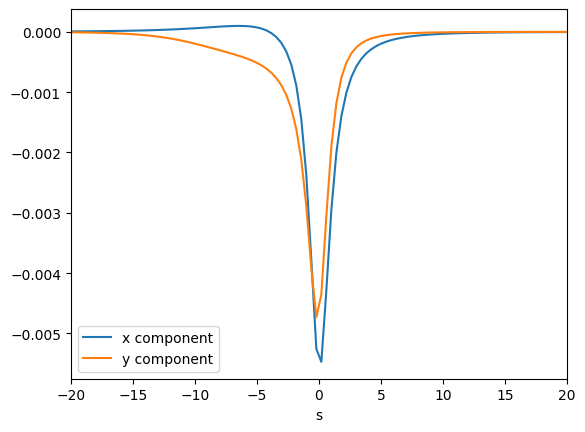

In [17]:
def find_lim1(s,x, y): # function represents the x component of E field
    E_x = (1/(1+(s**2)))*((x-s)/((x-s)**2 +y**2)**(3/2))
    #E_y = (1/1+(s**2))*((y)/((x-s)**2 +y**2)**(3/2))
    return E_x
def find_lim2(s,x, y):  # function represents the y component of E field
    #E_x = (1/(1+(s**2)))*((x-s)/((x-s)**2 +y**2)**(3/2))
    E_y = (1/(1+(s**2)))*((y)/((x-s)**2 +y**2)**(3/2))
    return E_y
xvalues1 = np.linspace(-20, 20, 100)
xx1 = random.randint(-10, 10)
yy1 = random.randint(-10, 10)
yvalues1 = np.array([find_lim1(x1, xx1, yy1) for x1 in xvalues1])
plt.plot(xvalues1, yvalues1, label = "x component")
plt.xlabel("s")
plt.ylabel

xvalues2 = np.linspace(-20, 20, 100)
xx2 = random.randint(-10, 10)
yy2 = random.randint(-10, 10)
yvalues2 = np.array([find_lim2(x2, xx2, yy2) for x2 in xvalues2])
plt.plot(xvalues2, yvalues2, label = "y component")
plt.legend()
plt.xlim(-20,20)
plt.show()

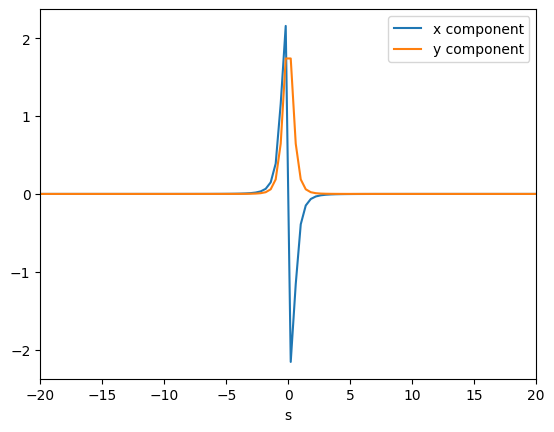

In [18]:
def find_lim1(s,x, y): # function represents the x component of E field
    E_x = (1/(1+(s**2)))*((x-s)/((x-s)**2 +y**2)**(3/2))
    #E_y = (1/1+(s**2))*((y)/((x-s)**2 +y**2)**(3/2))
    return E_x
def find_lim2(s,x, y):  # function represents the y component of E field
    #E_x = (1/(1+(s**2)))*((x-s)/((x-s)**2 +y**2)**(3/2))
    E_y = (1/(1+(s**2)))*((y)/((x-s)**2 +y**2)**(3/2))
    return E_y
xvalues1 = np.linspace(-20, 20, 100)
xx1 =0
yy1 = 0.4
yvalues1 = np.array([find_lim1(x1, xx1, yy1) for x1 in xvalues1])
plt.plot(xvalues1, yvalues1, label = "x component")
plt.xlabel("s")
plt.ylabel

xvalues2 = np.linspace(-20, 20, 100)
xx2 =0
yy2 = 0.7
yvalues2 = np.array([find_lim2(x2, xx2, yy2) for x2 in xvalues2])
plt.plot(xvalues2, yvalues2, label = "y component")
plt.legend()
plt.xlim(-20,20)
plt.show()

Our aim here is to find appropriate limits o integration for x and y in the range [-10,10] the such that f(s) does not approach infinity. After running the code for multiple times with random values of x and y, it is safe to assume that the limits of integration should be [-20,20].

### Basic Function

<font color = blue>
Now write a function that takes as inputs $x$ and $y$, and outputs $[E_x, E_y]$ as an array.  Test your function for a choice of $x$ and $y$ that is "close to" the center, and for a choice that is "far away" (but make sure $-10, < x, y < 10$.)  Confirm that both results match the analytic expectations.

In [19]:
def elec_field(x, y): #calculates the E field
    def func2(s): # x component
        E_x = (1/(1+(s**2)))*((x-s)/((x-s)**2 +y**2)**(3/2))
        return E_x
    def func3(s): # y component
        E_y = (1/(1+(s**2)))*((y)/((x-s)**2 +y**2)**(3/2))
        return E_y
    int_E_x = Simpson(func2, -20, 20, 1000)
    int_E_y = Simpson(func3, -20, 20, 1000)
    return int_E_x, int_E_y
x_far = -9
y_far = 9
y_close = 0.7
E_x_far = (math.pi*(x_far))/(x_far**2 + y_far**2)**(3/2)
E_y_far = (math.pi*(y_far))/(x_far**2 + y_far**2)**(3/2)
E_y_close = 2/y_close
print(E_x_far)
print(E_y_far)
print(E_y_close)
print(elec_field(-9,9)) # test
print(elec_field(0,0.7)) # test

-0.013712601660982612
0.013712601660982612
2.857142857142857
(-0.012194527699044722, 0.014095980612233163)
(3.2292898462354023e-16, 2.1596821446396524)


I have chosen the far values to be x = -9 and y = 9 for which i get the E fields x component to be -0.012194527699044722 which is very close to the analytically calculated value of -0.013712601660982612. Similarly the y component is  0.014095980612233163 which is also close to the analytically calculated value of 0.013712601660982612. 
For the values close to the center , my analytical x value is 0 and E field is 3.2292898462354023e-16 which is very close to 0. My y value analytically calculated is 2.857142857142857 which is also very close to my computed value for the y component 2.1596821446396524

### * Graphing a Data Set

<font color = blue>
Our goal is now to generate a graphic that displays our electric field.  To do this you can use the command "quiver" in matplotlib.pyplot, which you should begin by looking up examples of.  It takes as inputs four lists: a set of x-coordinates, a set of y-coordinates, a set of x-components for the vector at each coordinate, and a similar set of y-components.

You will want to use the "time" function to estimate how long it takes to compute a single pair $(E_x,E_y)$.  Based on this calculation, you should decide on a set of $(x, y)$ coordinates that cover the range $x, y \in [-10, 10]$.  Make sure you do not have any points that lie exactly on the line $y = 0$, as this will involve a divergent integrand.  Then use your function to create the desired lists, and the "quiver" command to display them.

\vspace{.1in}

After you have done this, generate a second list, but this time focusing on the range $x, y \in [-1, 1]$, and repeat the process.

Note: be prepared to play around a little to find a list of points that works well.

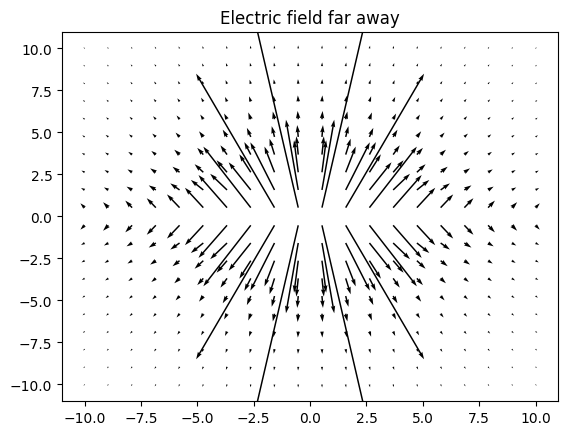

time per pair:  0.0026984989643096926


In [20]:
xcords = np.linspace(-10, 10,20)
ycords = np.linspace(-10, 10,20)
cords = [[x, y] for x in xcords for y in ycords]
x, y = zip(*cords)
start_time = time.time()
direction_vector = np.array([elec_field(cords[i][0], cords[i][1]) for i in range(len(cords))])
end_time = time.time()
totaltime = end_time - start_time
time_per_pair = totaltime/len(cords)
dir_x, dir_y =  zip(*direction_vector)
plt.quiver(x, y, dir_x, dir_y)
plt.title("Electric field far away")
plt.show()
print("time per pair: ",time_per_pair)

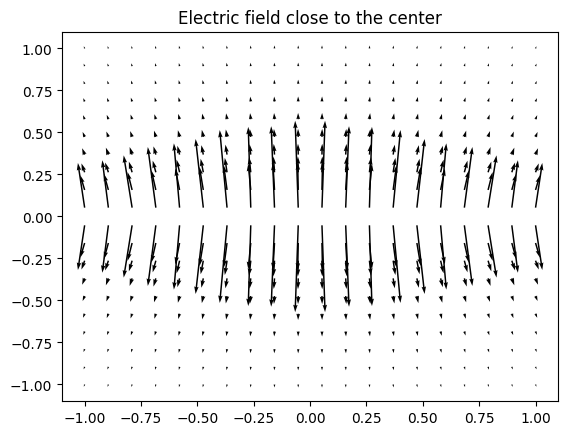

In [21]:
xcords = np.linspace(-1, 1,20)
ycords = np.linspace(-1, 1,20)
cords = [[x, y] for x in xcords for y in ycords]
x, y = zip(*cords)
direction_vector = np.array([elec_field(cords[i][0], cords[i][1]) for i in range(len(cords))])
dir_x, dir_y =  zip(*direction_vector)
plt.quiver(x, y, dir_x, dir_y)
plt.title("Electric field close to the center")
plt.show()

The two plots above show the electric field for a line charge from far away and close by. For both the cases we see that the Electric field is strongest near the x axis and then dies out as it moves radially outward. An interesting feature that we see here is that for the far away plot, it looks more like an electric fields of a point charge than a line charge. As we zoom out, we see another interesting feature here i.e. the vectors  start losing their x components which is also coherent with the analytical value of x = 0. In both the plots, none of the vectors start on the x axis. This is because at y = 0, the electric field integral is divergent. Although physically we know that the vectors which should have originated from the x axis are always overlapping the x axis in a radially outward manner. 

## Any Other Problem

<font color = blue>
Come up with a physical problem (different from the ones analyzed above) that yo can use either Simpson's method or a Monte Carlo technique to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

[]

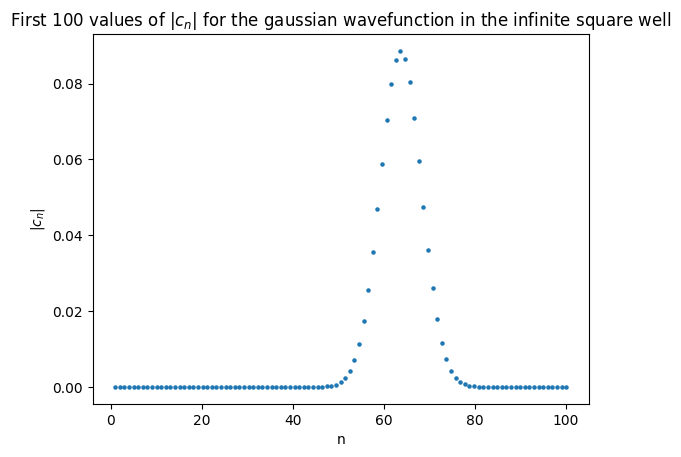

In [22]:
l = 2
h_bar = 1
x_0 = l/4
p_0 = (200*h_bar)/l
sigma_0 = l/20

def psi(x): #wave function
    a = 1/((math.pi**(1/4))*math.sqrt(sigma_0))
    b = np.exp(1j*p_0*x/h_bar)
    c = np.exp(-(x-x_0)**2/(2*sigma_0**2))
    return a*b*c
def cc(x,n): # mathematical function to be integrated
    return math.sin(n*math.pi*x/l) *psi(x)

def integrate(n): #integrating 
    def ccc(x): # mathematical function to be integrated
        return cc(x,n)
    return math.sqrt(2 /l)*(abs(Simpson(ccc, 0,l,200))**2)

n_values  = np.linspace(1,100, 99)
y_values = np.array([integrate(n) for n in n_values])
plt.scatter(n_values, y_values,s = 5)
plt.xlabel("n")
plt.ylabel("$|c_{n}|$")
plt.title("First 100 values of $|c_{n}|$ for the gaussian wavefunction in the infinite square well")
plt.plot()

We can write the given state of the particle in an infinite square well system as a linear combination of states of definite energy. The coefficients of these linear combinations $|c_{n}|^2$ which is the probability of the particle to be at that energy level. We know that not all integrals of wave functions can be calculated by pen and paper. Hence we can use our previously defined Simpson's approximation to approximate the area under the curve for n which runs from 1 to 100. We can then graphically determine the most probable energy state the particle might be in. 

From the graph above graph we can see that the particle is most likely to be in the energy state between n = 50 and n = 75. The curve that is generated here looks very similar to a Gaussian peaking at n = 64, i.e the most probable energy state for the particle to be in.